In [7]:
import requests
from bs4 import BeautifulSoup
import gzip
import json
from pathlib import Path
from urllib.parse import urljoin

# Create directory for downloaded files
data_dir = Path("case118_data")
data_dir.mkdir(exist_ok=True)

# Load any previously downloaded JSON files
all_data = {}
for file_path in sorted(data_dir.glob("*.json")):
    with open(file_path, "r") as f:
        all_data[file_path.stem] = json.load(f)

if all_data:
    print(f"Found {len(all_data)} local JSON files. Skipping re-download for existing data.")

# Base URL for the case118 folder
base_url = "https://axavier.org/UnitCommitment.jl/0.4/instances/matpower/case118/"
print("Fetching directory listing...")
response = requests.get(base_url)
response.raise_for_status()

# Parse HTML to find all .json.gz files
soup = BeautifulSoup(response.text, "html.parser")
json_files = sorted(
    href for link in soup.find_all("a") if (href := link.get("href")) and href.endswith(".json.gz")
)

print(f"Found {len(json_files)} JSON files on the server")

# Download and uncompress each file that is not already present
for filename in json_files:
    file_url = urljoin(base_url, filename)
    date_key = filename.replace(".json.gz", "")
    output_file = data_dir / filename.replace(".gz", "")

    if output_file.exists():
        print(f"Skipping download for {filename} (already exists)")
        if date_key not in all_data:
            with open(output_file, "r") as f:
                all_data[date_key] = json.load(f)
        continue

    print(f"Downloading {filename}...")
    response = requests.get(file_url)
    response.raise_for_status()

    decompressed = gzip.decompress(response.content)
    data = json.loads(decompressed.decode("utf-8"))

    all_data[date_key] = data

    with open(output_file, "w") as f:
        json.dump(data, f, indent=2)

    print(f"  ✓ Saved to {output_file}")

print(f"\nCompleted! Loaded {len(all_data)} datasets")
print(f"Files available in: {data_dir.resolve()}")
print(
    f"\nAvailable dates: {sorted(all_data.keys())[:10]}..."
    if len(all_data) > 10
    else f"\nAvailable dates: {sorted(all_data.keys())}"
)

Fetching directory listing...
Found 365 JSON files on the server
  ✓ Saved to case118_data/2017-01-01.json
  ✓ Saved to case118_data/2017-01-02.json
  ✓ Saved to case118_data/2017-01-03.json
  ✓ Saved to case118_data/2017-01-04.json
  ✓ Saved to case118_data/2017-01-05.json
  ✓ Saved to case118_data/2017-01-06.json
  ✓ Saved to case118_data/2017-01-07.json
  ✓ Saved to case118_data/2017-01-08.json
  ✓ Saved to case118_data/2017-01-09.json
  ✓ Saved to case118_data/2017-01-10.json
  ✓ Saved to case118_data/2017-01-11.json
  ✓ Saved to case118_data/2017-01-12.json
  ✓ Saved to case118_data/2017-01-13.json
  ✓ Saved to case118_data/2017-01-14.json
  ✓ Saved to case118_data/2017-01-15.json
  ✓ Saved to case118_data/2017-01-16.json
  ✓ Saved to case118_data/2017-01-17.json
  ✓ Saved to case118_data/2017-01-18.json
  ✓ Saved to case118_data/2017-01-19.json
  ✓ Saved to case118_data/2017-01-20.json
  ✓ Saved to case118_data/2017-01-21.json
  ✓ Saved to case118_data/2017-01-22.json
  ✓ Saved t

In [8]:
# Explore the data structure
if all_data:
    sample_date = list(all_data.keys())[0]
    sample_data = all_data[sample_date]
    
    print(f"Sample data from {sample_date}:")
    print(f"Keys: {list(sample_data.keys())}")
    print(f"\nData structure overview:")
    for key, value in sample_data.items():
        if isinstance(value, dict):
            print(f"  {key}: dict with {len(value)} items")
        elif isinstance(value, list):
            print(f"  {key}: list with {len(value)} items")
        else:
            print(f"  {key}: {type(value).__name__}")
    
    print(f"\nTotal datasets loaded: {len(all_data)}")

Sample data from 2017-01-01:
Keys: ['SOURCE', 'Parameters', 'Generators', 'Transmission lines', 'Contingencies', 'Buses', 'Reserves']

Data structure overview:
  SOURCE: str
  Parameters: dict with 3 items
  Generators: dict with 54 items
  Transmission lines: dict with 186 items
  Contingencies: dict with 177 items
  Buses: dict with 118 items
  Reserves: dict with 1 items

Total datasets loaded: 365


In [9]:
# Deep dive into the data structure
sample_date = '2017-01-01'
data = all_data[sample_date]

print("=" * 60)
print("BUSES (Nodes)")
print("=" * 60)
print(f"Number of buses: {len(data['Buses'])}")
print("\nSample bus data:")
first_bus = list(data['Buses'].keys())[0]
print(f"Bus ID: {first_bus}")
print(f"Attributes: {data['Buses'][first_bus]}")

print("\n" + "=" * 60)
print("TRANSMISSION LINES (Edges)")
print("=" * 60)
print(f"Number of transmission lines: {len(data['Transmission lines'])}")
print("\nSample transmission line data:")
first_line = list(data['Transmission lines'].keys())[0]
print(f"Line ID: {first_line}")
print(f"Attributes: {data['Transmission lines'][first_line]}")

print("\n" + "=" * 60)
print("GENERATORS")
print("=" * 60)
print(f"Number of generators: {len(data['Generators'])}")
print("\nSample generator data:")
first_gen = list(data['Generators'].keys())[0]
print(f"Generator ID: {first_gen}")
print(f"Attributes: {data['Generators'][first_gen]}")

print("\n" + "=" * 60)
print("PARAMETERS")
print("=" * 60)
print(f"Parameters: {data['Parameters']}")

BUSES (Nodes)
Number of buses: 118

Sample bus data:
Bus ID: b1
Attributes: {'Load (MW)': [35.79534, 34.38835, 33.45083, 32.89729, 33.25044, 33.93851, 35.8654, 37.27098, 38.08378, 38.99327, 38.65134, 38.83212, 37.60031, 37.27939, 37.11823, 37.73063, 40.951, 44.77115, 43.67527, 44.40959, 44.33812, 42.29071, 40.07654, 37.42093, 35.61175, 34.28185, 32.74174, 33.17336, 33.5181, 35.63558, 38.12722, 39.61689, 40.80105, 42.55277, 42.76017, 42.12535]}

TRANSMISSION LINES (Edges)
Number of transmission lines: 186

Sample transmission line data:
Line ID: l1
Attributes: {'Source bus': 'b1', 'Target bus': 'b2', 'Reactance (ohms)': 0.0999, 'Susceptance (S)': 17.47076}

GENERATORS
Number of generators: 54

Sample generator data:
Generator ID: g1
Attributes: {'Bus': 'b1', 'Production cost curve (MW)': [7.725471882302087, 28.251147866877407, 48.776823851452725, 69.30249983602806, 89.82817582060338], 'Production cost curve ($)': [784.5284243532219, 1378.0665459891406, 2003.355546705138, 3214.5478154839

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def create_power_grid_graph(data):
    """
    Create a NetworkX graph from MATPOWER data.

    Args:
        data: Dictionary containing MATPOWER test case data

    Returns:
        G: NetworkX graph with buses as nodes and transmission lines as edges
    """
    G = nx.Graph()

    # Add buses as nodes with their attributes
    for bus_id, bus_attrs in data['Buses'].items():
        G.add_node(bus_id, **bus_attrs)

    # Add generator information to the corresponding bus nodes
    for gen_id, gen_attrs in data['Generators'].items():
        bus = gen_attrs['Bus']
        if bus in G.nodes:
            # Add generator attributes to the bus node
            if 'generators' not in G.nodes[bus]:
                G.nodes[bus]['generators'] = []
            G.nodes[bus]['generators'].append({
                'id': gen_id,
                **{k: v for k, v in gen_attrs.items() if k != 'Bus'}
            })

    # Add transmission lines as edges
    for line_id, line_attrs in data['Transmission lines'].items():
        source = line_attrs['Source bus']
        target = line_attrs['Target bus']

        edge_attrs = {
            'line_id': line_id,
            **{k: v for k, v in line_attrs.items() if k not in ['Source bus', 'Target bus']}
        }

        G.add_edge(source, target, **edge_attrs)

    return G

# Create graph for a sample date
sample_date = '2017-01-01'
G = create_power_grid_graph(all_data[sample_date])

print(f"Graph Statistics for {sample_date}:")
print(f"  Number of nodes (buses): {G.number_of_nodes()}")
print(f"  Number of edges (transmission lines): {G.number_of_edges()}")
print(f"  Average degree: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")
print(f"  Is connected: {nx.is_connected(G)}")
print(f"\nNodes with generators:")
for node in G.nodes():
    if 'generators' in G.nodes[node]:
        num_gens = len(G.nodes[node]['generators'])
        print(f"  {node}: {num_gens} generator(s)")


Graph Statistics for 2017-01-01:
  Number of nodes (buses): 118
  Number of edges (transmission lines): 179
  Average degree: 3.03
  Is connected: True

Nodes with generators:
  b1: 1 generator(s)
  b4: 1 generator(s)
  b6: 1 generator(s)
  b8: 1 generator(s)
  b10: 1 generator(s)
  b12: 1 generator(s)
  b15: 1 generator(s)
  b18: 1 generator(s)
  b19: 1 generator(s)
  b24: 1 generator(s)
  b25: 1 generator(s)
  b26: 1 generator(s)
  b27: 1 generator(s)
  b31: 1 generator(s)
  b32: 1 generator(s)
  b34: 1 generator(s)
  b36: 1 generator(s)
  b40: 1 generator(s)
  b42: 1 generator(s)
  b46: 1 generator(s)
  b49: 1 generator(s)
  b54: 1 generator(s)
  b55: 1 generator(s)
  b56: 1 generator(s)
  b59: 1 generator(s)
  b61: 1 generator(s)
  b62: 1 generator(s)
  b65: 1 generator(s)
  b66: 1 generator(s)
  b69: 1 generator(s)
  b70: 1 generator(s)
  b72: 1 generator(s)
  b73: 1 generator(s)
  b74: 1 generator(s)
  b76: 1 generator(s)
  b77: 1 generator(s)
  b80: 1 generator(s)
  b85: 1 gener

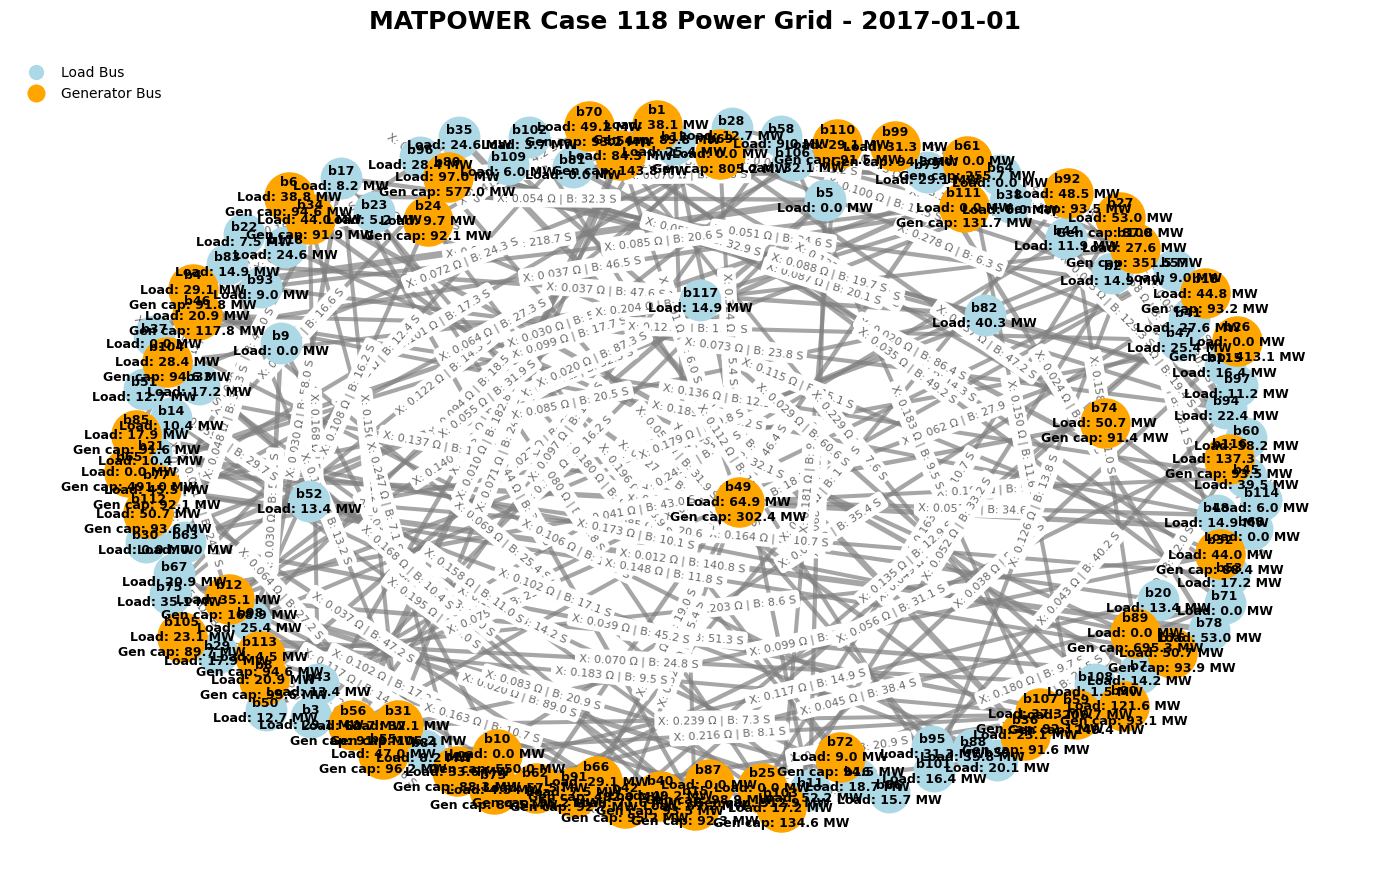


Detailed Node Information:
--------------------------------------------------------------------------------
b1: Degree=2, Load=35.80 MW | 1 generator(s)
b10: Degree=1, Load=0.00 MW | 1 generator(s)
b100: Degree=8, Load=25.97 MW | 1 generator(s)
b101: Degree=2, Load=15.44 MW
b102: Degree=2, Load=3.51 MW
b103: Degree=4, Load=16.14 MW | 1 generator(s)
b104: Degree=3, Load=26.67 MW | 1 generator(s)
b105: Degree=5, Load=21.76 MW | 1 generator(s)
b106: Degree=3, Load=30.18 MW
b107: Degree=2, Load=35.09 MW | 1 generator(s)
b108: Degree=2, Load=1.40 MW
b109: Degree=2, Load=5.61 MW
b11: Degree=4, Load=49.13 MW
b110: Degree=4, Load=27.37 MW | 1 generator(s)
b111: Degree=1, Load=0.00 MW | 1 generator(s)
b112: Degree=1, Load=47.73 MW | 1 generator(s)
b113: Degree=2, Load=4.21 MW | 1 generator(s)
b114: Degree=2, Load=5.61 MW
b115: Degree=2, Load=15.44 MW
b116: Degree=1, Load=129.14 MW | 1 generator(s)
b117: Degree=1, Load=14.04 MW
b118: Degree=2, Load=23.16 MW
b12: Degree=7, Load=32.99 MW | 1 gene

In [11]:
def visualize_power_grid(G, date_str):
    """
    Visualize the power grid graph with enhanced styling and generator info.

    Args:
        G: NetworkX graph
        date_str: String representing the date of the data
    """
    plt.rcParams.update({
        "font.family": "DejaVu Sans",
        "axes.titleweight": "bold"
    })
    fig, ax = plt.subplots(1, 1, figsize=(14, 9))

    # Use spring layout for better visualization
    pos = nx.spring_layout(G, k=2, iterations=50, seed=42)

    # Identify nodes with generators
    nodes_with_gens = [node for node in G.nodes() if 'generators' in G.nodes[node]]
    nodes_without_gens = [node for node in G.nodes() if 'generators' not in G.nodes[node]]

    # Draw nodes without generators (load buses)
    nx.draw_networkx_nodes(G, pos,
                          nodelist=nodes_without_gens,
                          node_color='lightblue',
                          node_size=850,
                          label='Load Bus',
                          ax=ax)

    # Draw nodes with generators
    nx.draw_networkx_nodes(G, pos,
                          nodelist=nodes_with_gens,
                          node_color='orange',
                          node_size=1250,
                          label='Generator Bus',
                          ax=ax)

    # Draw edges with varying thickness based on susceptance
    edges = G.edges()
    susceptances = [G[u][v].get('Susceptance (S)', 1) for u, v in edges]
    max_susc = max(susceptances) if susceptances else 1
    widths = [2.8 + 4.2 * (s / max_susc) if max_susc else 2.8 for s in susceptances]

    nx.draw_networkx_edges(G, pos,
                          width=widths,
                          alpha=0.7,
                          edge_color='gray',
                          ax=ax)

    # Draw labels with load and generator capacity information
    node_labels = {}
    for node in G.nodes():
        load_val = G.nodes[node].get('Load (MW)', 0)
        if isinstance(load_val, list) and load_val:
            load = float(np.mean(load_val))
        elif isinstance(load_val, (int, float)):
            load = float(load_val)
        else:
            load = 0.0

        label_lines = [f"{node}", f"Load: {load:.1f} MW"]

        if 'generators' in G.nodes[node]:
            generators = G.nodes[node]['generators']
            max_caps = []
            for gen in generators:
                curve = gen.get('Production cost curve (MW)')
                if isinstance(curve, list) and curve:
                    max_caps.append(max(curve))
            if max_caps:
                total_cap = sum(max_caps)
                label_lines.append(f"Gen cap: {total_cap:.1f} MW")

        node_labels[node] = "\n".join(label_lines)

    nx.draw_networkx_labels(G, pos,
                           labels=node_labels,
                           font_size=9,
                           font_weight='bold',
                           ax=ax)

    # Draw edge labels for transmission attributes
    edge_labels = {}
    for u, v, attrs in G.edges(data=True):
        capacity = attrs.get('Transmission capacity (MW)')
        if isinstance(capacity, (int, float)):
            edge_labels[(u, v)] = f"Cap: {capacity:.1f} MW"
        else:
            reactance = attrs.get('Reactance (ohms)')
            susceptance = attrs.get('Susceptance (S)')
            parts = []
            if isinstance(reactance, (int, float)):
                parts.append(f"X: {reactance:.3f} Ω")
            if isinstance(susceptance, (int, float)):
                parts.append(f"B: {susceptance:.1f} S")
            edge_labels[(u, v)] = " | ".join(parts) if parts else "No rating"
    
    nx.draw_networkx_edge_labels(G, pos,
                                 edge_labels=edge_labels,
                                 font_color='dimgray',
                                 font_size=8,
                                 ax=ax)

    # Add title and legend
    ax.set_title(f'MATPOWER Case 118 Power Grid - {date_str}',
                fontsize=18, pad=18)
    legend_handles = [
        plt.Line2D([], [], marker='o', color='w', markerfacecolor='lightblue', markersize=12, label='Load Bus'),
        plt.Line2D([], [], marker='o', color='w', markerfacecolor='orange', markersize=14, label='Generator Bus')
    ]
    ax.legend(handles=legend_handles, loc='upper left', frameon=False)
    ax.axis('off')

    fig.tight_layout()
    plt.show()

    # Print additional statistics
    print(f"\nDetailed Node Information:")
    print("-" * 80)
    for node in sorted(G.nodes()):
        degree = G.degree(node)
        load_val = G.nodes[node].get('Load (MW)', 0)
        # Handle case where load might be a list
        if isinstance(load_val, list):
            load = load_val[0] if load_val else 0
        else:
            load = load_val
        gen_info = ""
        if 'generators' in G.nodes[node]:
            num_gens = len(G.nodes[node]['generators'])
            gen_info = f" | {num_gens} generator(s)"
        print(f"{node}: Degree={degree}, Load={load:.2f} MW{gen_info}")

# Visualize the graph
visualize_power_grid(G, sample_date)

In [12]:
# Demonstrate how to access graph attributes programmatically

print("=" * 80)
print("Example: Accessing Node Attributes")
print("=" * 80)

# Get a specific node's attributes
node_id = 'b2'
print(f"\nAttributes of node {node_id}:")
for attr_name, attr_value in G.nodes[node_id].items():
    print(f"  {attr_name}: {attr_value}")

print("\n" + "=" * 80)
print("Example: Accessing Edge Attributes")
print("=" * 80)

# Get a specific edge's attributes
edge = ('b1', 'b2')
if G.has_edge(*edge):
    print(f"\nAttributes of edge {edge}:")
    for attr_name, attr_value in G.edges[edge].items():
        print(f"  {attr_name}: {attr_value}")

print("\n" + "=" * 80)
print("Example: Graph Analysis")
print("=" * 80)

# Some basic graph analysis
print(f"\nDegree centrality (top 5 most connected buses):")
degree_centrality = nx.degree_centrality(G)
top_5_central = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
for node, centrality in top_5_central:
    print(f"  {node}: {centrality:.3f}")

print(f"\nBetweenness centrality (top 5 most critical buses):")
betweenness = nx.betweenness_centrality(G)
top_5_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]
for node, centrality in top_5_betweenness:
    print(f"  {node}: {centrality:.3f}")

print(f"\nShortest path from b1 to b14:")
path = nx.shortest_path(G, 'b1', 'b14')
print(f"  {' -> '.join(path)}")
print(f"  Path length: {len(path) - 1} hops")

Example: Accessing Node Attributes

Attributes of node b2:
  Load (MW): [14.03739, 13.48563, 13.11797, 12.9009, 13.03939, 13.30922, 14.06486, 14.61607, 14.93482, 15.29148, 15.15739, 15.22828, 14.74522, 14.61937, 14.55617, 14.79633, 16.05921, 17.55731, 17.12756, 17.41553, 17.3875, 16.58459, 15.71629, 14.67487, 13.96539, 13.44386, 12.8399, 13.00916, 13.14435, 13.97474, 14.95185, 15.53603, 16.00041, 16.68736, 16.76869, 16.51974]

Example: Accessing Edge Attributes

Attributes of edge ('b1', 'b2'):
  line_id: l1
  Reactance (ohms): 0.0999
  Susceptance (S): 17.47076

Example: Graph Analysis

Degree centrality (top 5 most connected buses):
  b49: 0.077
  b100: 0.068
  b12: 0.060
  b80: 0.060
  b17: 0.051

Betweenness centrality (top 5 most critical buses):
  b69: 0.312
  b77: 0.287
  b65: 0.284
  b80: 0.283
  b38: 0.270

Shortest path from b1 to b14:
  b1 -> b2 -> b12 -> b14
  Path length: 3 hops
